# <center>Đồ án 3: Linear Regression</center>

# Thông tin sinh viên

- Họ và tên: Lê Thị Hồng Hạnh
- MSSV: 22127103
- Lớp: 22CLC07

# Import

In [211]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Import thêm dữ thư viện nếu cần

# Đọc dữ liệu

In [213]:
# Đọc dữ liệu bằng pandas
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Lấy các đặc trưng X và giá trị mục tiêu y cho các tập huấn luyện (train) và kiểm tra (test)
X_train = train.iloc[:, :-1]    # Dataframe (chứa 5 đặc trưng huấn luyện)
y_train = train.iloc[:, -1]     # Series    (chứa 1 giá trị mục tiêu huấn luyện)

X_test = test.iloc[:, :-1]      # Dataframe (chứa 5 đặc trưng kiểm tra)
y_test = test.iloc[:, -1]       # Series    (chứa 1 giá trị mục tiêu kiểm tra)

# Sinh viên có thể sử dụng các khác nếu cần

# Cài đặt hàm

In [215]:
# Cài đặt các hàm cần thiết ở đây
class OLSLinearRegression:
    def fit(self, X, y):
        ''' 
        This function is used to fit the model to the data. It uses the Ordinary Least Squares method to find the optimal parameters.

        Parameters
        ----------
        X : np.array
            Input data
        y : np.array
            Output data

        Returns
        -------
        self : object
            Returns the instance of the class
        
        '''

        X_pinv = np.linalg.inv(X.T @ X) @ X.T    # np.linalg.pinv(X)
        self.w = X_pinv @ y

        return self


    def get_params(self):
        ''' 
        This function is used to get the parameters of the model.

        Returns
        -------
        self.w : np.array
            Optimal parameters (column vector)
        '''

        return self.w


    def predict(self, X):
        ''' 
        This function is used to predict the output of the model.

        Parameters
        ----------
        X : np.array
            Input data

        Returns
        -------
        X @ self.w : np.array
            Predicted output
        '''

        return X @ self.w   # Equivalent to np.dot(X, self.w). But why?

In [217]:
def mae(y, y_hat):
    ''' 
    This function is used to calculate the mean absolute error (MAE).

    Parameters
    ----------
    y : np.array
        Output data
    y_hat : np.array
        Predicted output data

    Returns
    -------
    np.mean(np.abs(y.ravel() - y_hat.ravel())) : float
        Mean absolute error
    '''

    return np.mean(np.abs(y.ravel() - y_hat.ravel()))

*Chú thích: Cần có docstrings cho các hàm.*

# Yêu cầu 1: Phân tích khám phá dữ liệu (1 điểm)

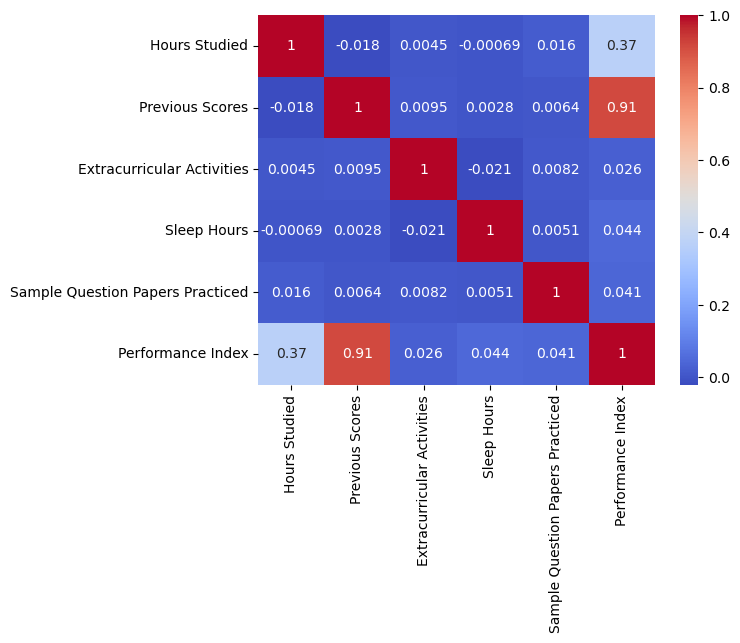

In [219]:
# Phân tích khám phá dữ liệu thông qua thống kê và các biểu đồ
# Chỉ được phân tích trên tập huấn luyện
sns.heatmap(train.corr(), annot=True, cmap='coolwarm');

In [221]:
# Chia dữ liệu Performance Index thành 4 khoảng để dễ dàng thống kê bằng biểu đồ
categories = ['1', '2', '3', '4']
classification_pi = pd.qcut(train['Performance Index'], 4, labels=categories)
classification_pi

0       3
1       4
2       4
3       1
4       3
       ..
8995    1
8996    2
8997    2
8998    1
8999    2
Name: Performance Index, Length: 9000, dtype: category
Categories (4, object): ['1' < '2' < '3' < '4']

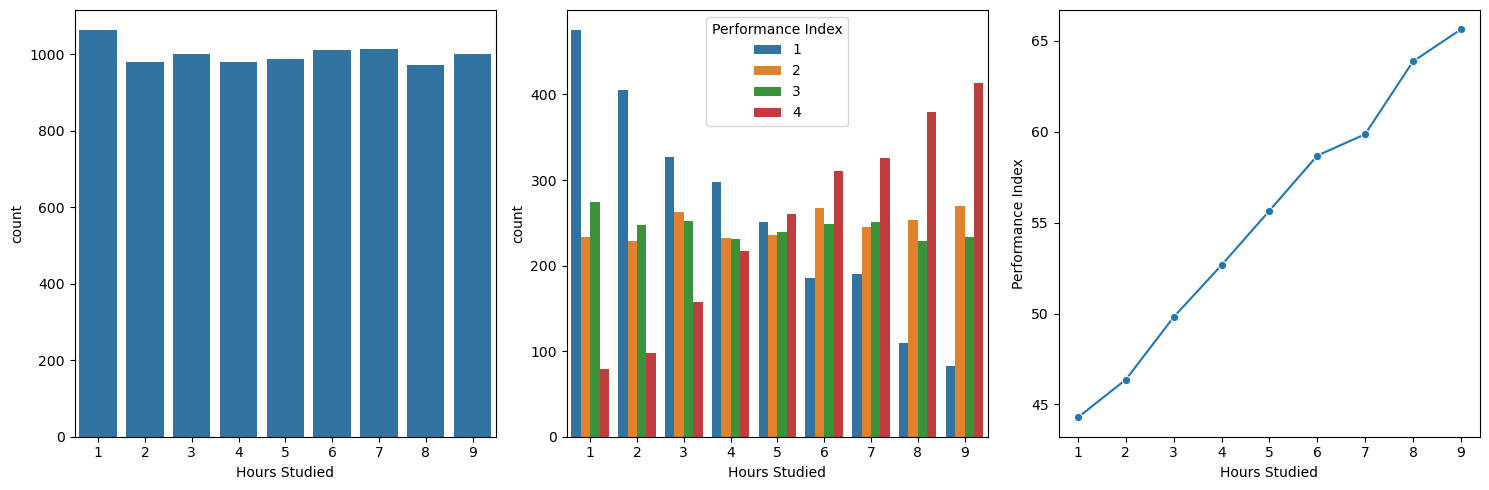

In [223]:
# Hours Studied
hs = train[['Hours Studied', 'Performance Index']]
pi_avg_hs = hs.groupby(['Hours Studied']).mean()
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.countplot(data=train, x='Hours Studied', ax=ax[0])
sns.countplot(data=train, x='Hours Studied', hue=classification_pi, ax=ax[1])
sns.lineplot(data=pi_avg_hs, x='Hours Studied', y='Performance Index', marker='o', ax=ax[2])
plt.tight_layout()

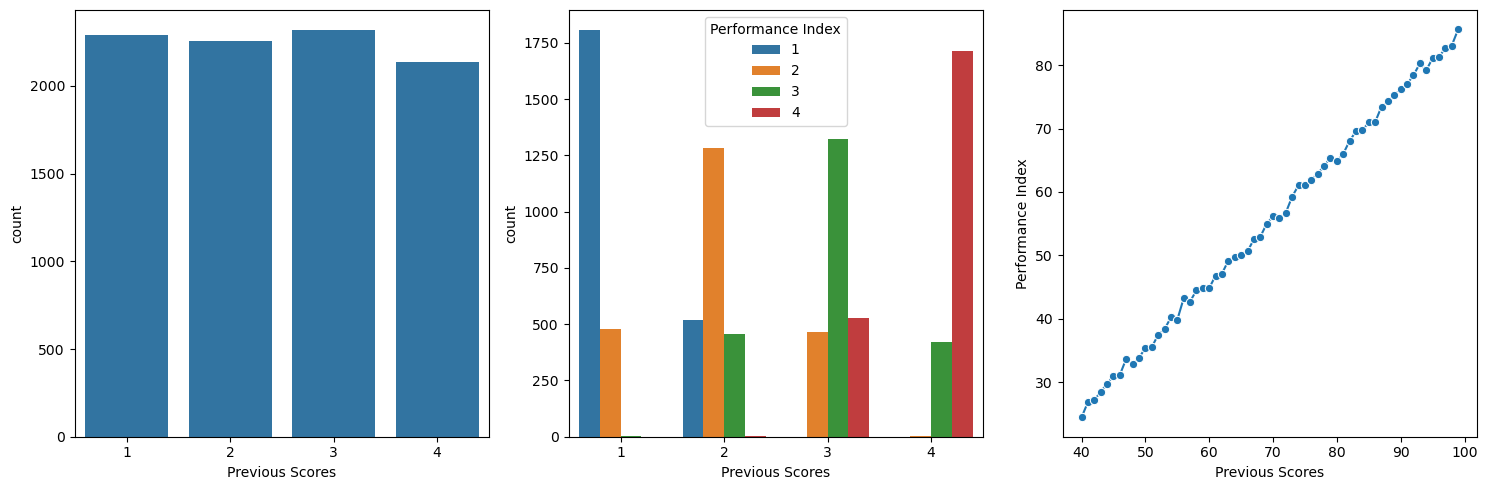

In [225]:
# Previous Scores
ps = train[['Previous Scores', 'Performance Index']]
pi_avg_ps = ps.groupby(['Previous Scores']).mean()
classification_ps = pd.qcut(train['Previous Scores'], 4, labels=categories)
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.countplot(data=pd.DataFrame(classification_ps), x='Previous Scores', ax=ax[0])
sns.countplot(data=pd.DataFrame(classification_ps), x='Previous Scores', hue=classification_pi, ax=ax[1])
sns.lineplot(data=pi_avg_ps, x='Previous Scores', y='Performance Index', marker='o', ax=ax[2])
plt.tight_layout()

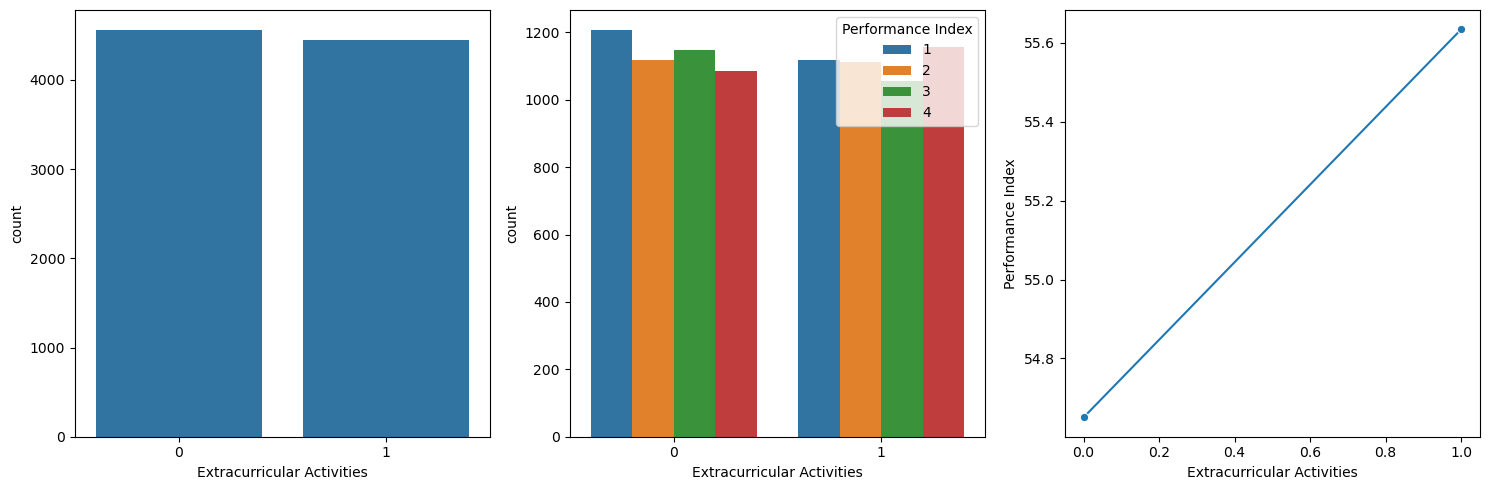

In [227]:
# Extracurricular Activities
ea = train[['Extracurricular Activities', 'Performance Index']]
pi_avg_ea = ea.groupby('Extracurricular Activities').mean()
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.countplot(data=train, x='Extracurricular Activities', ax=ax[0])
sns.countplot(data=train, x='Extracurricular Activities', hue=classification_pi, ax=ax[1])
sns.lineplot(data=pi_avg_ea, x='Extracurricular Activities', y='Performance Index', marker='o', ax=ax[2])
plt.tight_layout()

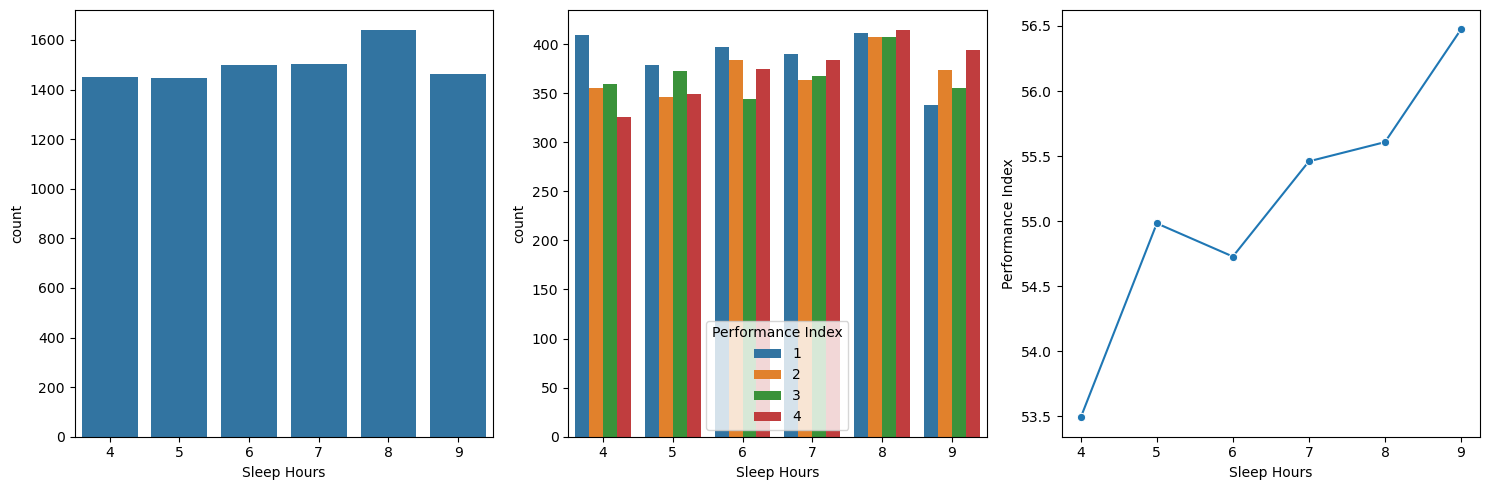

In [229]:
# Sleep Hours
sh = train[['Sleep Hours', 'Performance Index']]
pi_avg_sh = sh.groupby(['Sleep Hours']).mean()
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.countplot(data=train, x='Sleep Hours', ax=ax[0])
sns.countplot(data=train, x='Sleep Hours', hue=classification_pi, ax=ax[1])
sns.lineplot(data=pi_avg_sh, x='Sleep Hours', y='Performance Index', marker='o', ax=ax[2])
plt.tight_layout()

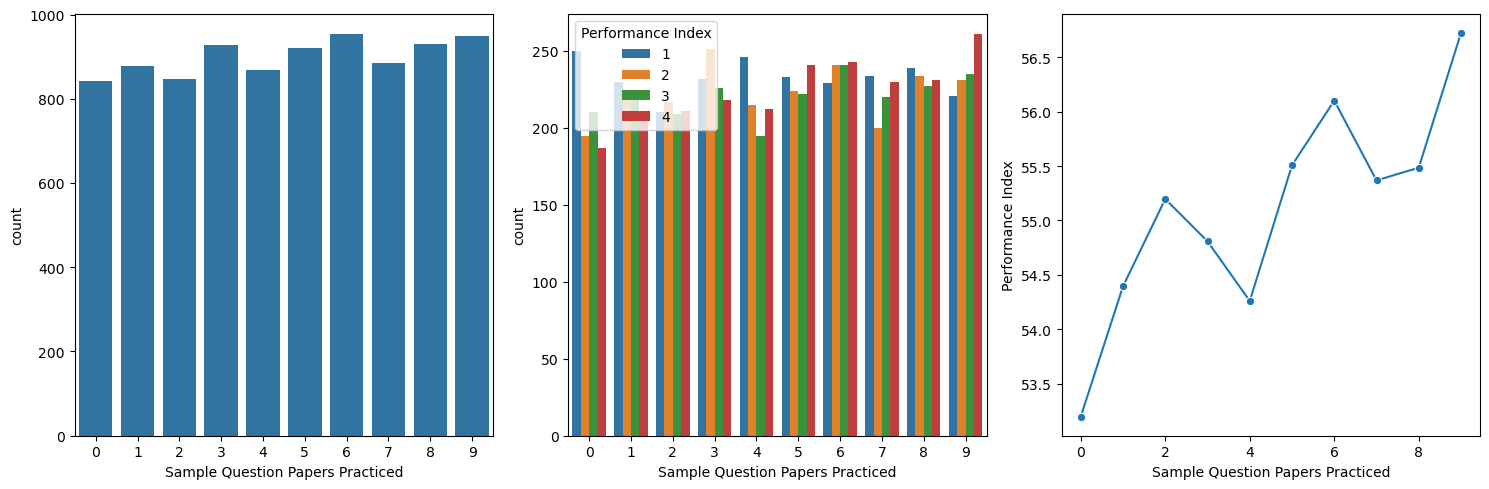

In [231]:
# Sample Question Papers Practiced
sq = train[['Sample Question Papers Practiced', 'Performance Index']]
pi_avg_sq = sq.groupby(['Sample Question Papers Practiced']).mean()
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.countplot(data=train, x='Sample Question Papers Practiced', ax=ax[0])
sns.countplot(data=train, x='Sample Question Papers Practiced', hue=classification_pi, ax=ax[1])
sns.lineplot(data=pi_avg_sq, x='Sample Question Papers Practiced', y='Performance Index', marker='o',ax=ax[2])
plt.tight_layout()

# Yêu cầu 2a: Xây dựng mô hình sử dụng toàn bộ 5 đặc trưng đề bài cung cấp (2 điểm) 

Phương trình hồi quy tuyến tính:
$$PI = w_0 + w_1HS + w_2PS + w_3EA + w_4SH + w_5SQ $$
- $PI$: Performance Index
- $HS$: Hours Studied
- $PS$: Previous Scores
- $EA$: Extracurricular Activities
- $SH$: Sleep Hours
- $SQ$: Sample Question Papers Practiced

In [233]:
# Phần code cho yêu cầu 2a
Xm_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train)).astype(float)
ym_train = y_train.to_numpy().reshape(-1, 1)
lr = OLSLinearRegression().fit(Xm_train, ym_train)
w = np.round(lr.get_params(), 3) #làm tròn 3 chữ số thập phân
w

array([[-33.969],
       [  2.852],
       [  1.018],
       [  0.604],
       [  0.474],
       [  0.192]])

In [235]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra
Xm_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test)).astype(float)
ym_test = y_test.to_numpy().reshape(-1, 1)
y_hat = lr.predict(Xm_test)
mae(ym_test, y_hat)

1.5956486884762935

Công thức hồi quy, phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012

$$\text{Student Performance} = -33.969 + 2.852HS + 1.018PS + 0.604EA + 0.474SH + 0.192SQ$$
- $HS$: Hours Studied
- $PS$: Previous Scores
- $EA$: Extracurricular Activities
- $SH$: Sleep Hours
- $SQ$: Sample Question Papers Practiced

# Yêu cầu 2b: Xây dựng mô hình sử dụng duy nhất 1 đặc trưng, tìm mô hình cho kết quả tốt nhất (2 điểm)

Lưu ý: Khi sử dụng cross-validation, sinh viên cần xáo trộn dữ liệu 1 lần duy nhất và thực hiện trên toàn bộ đặc trưng

In [52]:
# Phần code cho yêu cầu 2b
# Tìm ra đặc trưng tốt nhất (trong 5 đặc trưng)
# In ra các kết quả cross-validation như yêu cầu
D = train.to_numpy()
np.random.shuffle(D)
k=5
maes = np.zeros((5, k))
for i in range (0, k):
    D_val = D[int(i*(D.shape[0]/k)):int((i+1)*(D.shape[0]/k))]
    D_train = np.concatenate((D[:int(i*(D.shape[0]/k))], D[int((i+1)*(D.shape[0]/k)):]), axis=0)
    ym_train = D_train[:, -1].reshape(-1, 1)
    ym_val = D_val[:, -1].reshape(-1, 1)
    for j in range (0, 5):
        Xm_train = np.hstack((np.ones((D_train.shape[0], 1)), D_train[:, j].reshape(-1, 1)))
        Xm_val = np.hstack((np.ones((D_val.shape[0], 1)), D_val[:, j].reshape(-1, 1)))
        lr = OLSLinearRegression().fit(Xm_train, ym_train)
        y_hat = lr.predict(Xm_val)
        m = mae(ym_val, y_hat)
        maes[j, i] = m
maes_avg = np.average(maes, axis=1)
np.round(maes_avg, 3)

array([15.448,  6.618, 16.193, 16.186, 16.184])

<center>

| STT | Mô hình với 1 đặc trưng 		| MAE  |
|:---:|:-------------------------------:|:----:|
|  1  | Hours Studied			        |15.448|
|  2  | Previous Scores			        |6.618|
|  3  | Extracurricular Activities		|16.193|
|  4  | Sleep Hours						|16.186|
|  5  | Sample Question Papers Practiced|16.184|

</center>
Đặc trưng cho kết quả tốt nhất là Previous Scores, tiến hành train mô hình với đặc trưng Previous Scores

In [237]:
# Huấn luyện lại mô hình best_feature_model với đặc trưng tốt nhất trên toàn bộ tập huấn luyện
Xm_train_2b = np.hstack((np.ones((X_train.shape[0], 1)), X_train.to_numpy()[:, 1].reshape(-1, 1)))
ym_train_2b = y_train.to_numpy().reshape(-1, 1)
best_feature_model = OLSLinearRegression().fit(Xm_train_2b, ym_train_2b)
w_2b = np.round(best_feature_model.get_params(), 3)
w_2b

array([[-14.989],
       [  1.011]])

In [239]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra với mô hình best_feature_model
Xm_test_2b = np.hstack((np.ones((X_test.shape[0], 1)), X_test.to_numpy()[:, 1].reshape(-1, 1)))
ym_test_2b = y_test.to_numpy().reshape(-1, 1)
y_hat_2b = best_feature_model.predict(Xm_test_2b)
mae(ym_test_2b, y_hat_2b)

6.544277293452506

Công thức hồi quy (dựa trên mô hình đặc trưng tốt nhất), phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012

$$\text{Student Performance} = -14.989 + 1.011 * Previous Scores$$

# Yêu cầu 2c: Sinh viên tự xây dựng/thiết kế mô hình, tìm mô hình cho kết quả tốt nhất (2 điểm)

## Xây dựng/Thiết kế mô hình

### Mô hình 1
Dựa vào biểu đồ tương quan và các thống kê nêu ở phần phân tích, $HS$ và $PS$ là 2 đặc trưng hệ số tương quan và ảnh hưởng lớn nhất đến $PI$, do đó xây dựng mô hình sử dụng 2 đặc trưng này:
$$PI = w_0 + w_1HS + w_2PS$$
### Mô hình 2
Ngoài $HS$ và $PS$ có hệ số tương quan lớn, các đặc trưng còn lại cũng có hệ số tương quan dương và có tác động đến $PI$. Đặc biệt là đối với $SH$ và $SQ$, sự ảnh hưởng chỉ xuất hiện rõ rệt khi $SH$ và $SQ$ ở mức cao nhất hoặc thấp nhất, do đó ta tạo ra một đặc trưng mới là tổng của $SH$ và $SQ$. Mô hình có dạng:
$$PI = w_0 + w_1HS + w_2PS + w_3EA + w_4(SH+SQ)$$
### Mô hình 3
Như đã nêu trên, sự ảnh hưởng của $SH$ và $SQ$ chỉ rõ ràng khi giá trị của chúng ở các mức cao nhất và thấp nhất. Do đó, ta tiến hành bình phương giá trị của $SH$ và $SQ$ để gia tăng sự chênh lệch giữa các mức giá trị. Mô hình sẽ có dạng:
$$PI = w_0 + w_1HS + w_2PS + w_3EA + w_4SH^2 + w_5SQ^2$$

## Tìm mô hình cho kết quả tốt nhất

Lưu ý: Khi sử dụng cross-validation, sinh viên cần xáo trộn dữ liệu 1 lần duy nhất và thực hiện trên toàn bộ $m$ mô hình mà sinh viên thiết kế

In [105]:
# Phần code cho yêu cầu 2c
# Tìm ra mô hình tốt nhất (trong m mô hình mà sinh viên tự thiết kế)
# In ra các kết quả cross-validation như yêu cầu
k=5

In [241]:
# Mô hình 1
maes_1 = np.zeros(k)
for i in range (0, k):
    D_val = D[int(i*(D.shape[0]/k)):int((i+1)*(D.shape[0]/k))]
    D_train = np.concatenate((D[:int(i*(D.shape[0]/k))], D[int((i+1)*(D.shape[0]/k)):]), axis=0)
    ym_train = D_train[:, -1].reshape(-1, 1)
    ym_val = D_val[:, -1].reshape(-1, 1)
    Xm_train = np.hstack((np.ones((D_train.shape[0], 1)), D_train[:, 0:2])) #column 1: SH, column 2: PS
    Xm_val = np.hstack((np.ones((D_val.shape[0], 1)), D_val[:, 0:2]))
    model_1 = OLSLinearRegression().fit(Xm_train, ym_train)
    y_hat = model_1.predict(Xm_val)
    m = mae(ym_val, y_hat)
    maes_1[i] = m
maes_avg_1 = np.average(maes_1)
np.round(maes_avg_1, 3)

1.816

In [243]:
# Mô hình 2
maes_2 = np.zeros(k)
for i in range (0, k):
    D_val = D[int(i*(D.shape[0]/k)):int((i+1)*(D.shape[0]/k))]
    D_train = np.concatenate((D[:int(i*(D.shape[0]/k))], D[int((i+1)*(D.shape[0]/k)):]), axis=0)
    ym_train = D_train[:, -1].reshape(-1, 1)
    ym_val = D_val[:, -1].reshape(-1, 1)
    Xm_train = np.hstack((np.ones((D_train.shape[0], 1)), D_train[:, 0:3], (D_train[:, 3]+D_train[:, 4]).reshape(-1, 1)))
    Xm_val = np.hstack((np.ones((D_val.shape[0], 1)), D_val[:, 0:3], (D_val[:, 3]+D_val[:, 4]).reshape(-1, 1)))
    model_2 = OLSLinearRegression().fit(Xm_train, ym_train)
    y_hat = model_2.predict(Xm_val)
    m = mae(ym_val, y_hat)
    maes_2[i] = m
maes_avg_2 = np.average(maes_2)
np.round(maes_avg_2, 3)

1.653

In [245]:
# Mô hình 3
maes_3 = np.zeros(k)
for i in range (0, k):
    D_val = D[int(i*(D.shape[0]/k)):int((i+1)*(D.shape[0]/k))]
    D_train = np.concatenate((D[:int(i*(D.shape[0]/k))], D[int((i+1)*(D.shape[0]/k)):]), axis=0)
    ym_train = D_train[:, -1].reshape(-1, 1)
    ym_val = D_val[:, -1].reshape(-1, 1)
    Xm_train = np.hstack((np.ones((D_train.shape[0], 1)), D_train[:, 0:3], (D_train[:, 3]**2).reshape(-1, 1), (D_train[:, 4]**2).reshape(-1, 1)))
    Xm_val = np.hstack((np.ones((D_val.shape[0], 1)), D_val[:, 0:3], (D_val[:, 3]**2).reshape(-1, 1), (D_val[:, 4]**2).reshape(-1, 1)))
    model_3 = OLSLinearRegression().fit(Xm_train, ym_train)
    y_hat = model_3.predict(Xm_val)
    m = mae(ym_val, y_hat)
    maes_3[i] = m
maes_avg_3 = np.average(maes_3)
np.round(maes_avg_3, 3)

1.625

<center>
    
| STT |           Mô hình          | MAE  |
|:---:|:--------------------------:|:----:|
|  1  | Sử dụng 2 đặc trưng ($HS$, $PS$) | 1.816|
|  2  | Sử dụng đặc trưng $HS$, $PS$, $EA$ và một đặc trưng mới là tổng của $SH$ và $SQ$|1.653|
|  3  | Sử dụng đặc trưng $HS$, $PS$, $EA$ và bình phương $SH$ và $SQ$                  |1.625|

</center>

Mô hình cho kết quả tốt nhất là mô hình 3, tiến hành train mô hình 3 trên tập train

In [247]:
# Huấn luyện lại mô hình my_best_model trên toàn bộ tập huấn luyện
Xm_train_2c = np.hstack((np.ones((X_train.shape[0], 1)), X_train.to_numpy()[:, 0:3], (X_train.to_numpy()[:, 3]**2).reshape(-1, 1), (X_train.to_numpy()[:, 4]**2).reshape(-1, 1)))
ym_train_2c = y_train.to_numpy().reshape(-1, 1)
my_best_model = OLSLinearRegression().fit(Xm_train_2c, ym_train_2c)
my_best_w = np.round(my_best_model.get_params(), 3) #làm tròn 3 chữ số thập phân
my_best_w

array([[-3.2222e+01],
       [ 2.8530e+00],
       [ 1.0180e+00],
       [ 6.0900e-01],
       [ 3.6000e-02],
       [ 2.0000e-02]])

In [249]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra với mô hình my_best_model
Xm_test_2c = np.hstack((np.ones((X_test.shape[0], 1)), X_test.to_numpy()[:, 0:3], (X_test.to_numpy()[:, 3]**2).reshape(-1, 1), (X_test.to_numpy()[:, 4]**2).reshape(-1, 1)))
ym_test_2c = y_test.to_numpy().reshape(-1, 1)
y_hat_2c = my_best_model.predict(Xm_test_2c)
mae(ym_test_2c, y_hat_2c)

1.6000169942128741

Công thức hồi quy (dựa trên mô hình tốt nhất mà sinh viên tự xây dựng/thiết kế), phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012

$$\text{Student Performance} = -32.222 + 2.853HS + 1.018PS + 0.609EA + 0.036SH^2 + 0.02SQ^2$$